
# Pr√°ctica 2: Metaheur√≠sticas basadas en trayectorias: Tabu Search

<center><h3>
    Diego Barreiro P√©rez
</h3></center>

# ‚ö†Ô∏è Instrucciones

Igual que en la Pr√°ctica 1, utilizaremos un **Jupyter Notebook** para la resoluci√≥n de esta pr√°ctica.

Como ya sab√©is, nos permite ir ejecutando celdas de c√≥digo poco a poco, as√≠ como generar autom√°ticamente un informe bien formateado de la pr√°ctica. Aun as√≠, a continuaci√≥n ten√©is unas breves instrucciones sobre como funciona:

* Puedes a√±adir una celda con el bot√≥n **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de c√≥digo, la seleccionaremos y pulsaremos el bot√≥n **"‚ñ∂ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este gui√≥n hasta el final. Ejecuta el c√≥digo proporcionado paso a paso comprendiendo lo que est√°s haciendo y reflexionando sobre los resultados. Habr√° preguntas intercaladas a lo largo del gui√≥n, responde a todas ellas en la secci√≥n reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de c√≥digo excepto cuando se te pida expl√≠citamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedir√°n dos implementaciones del algoritmo de B√∫squeda Tab√∫, una primera implementaci√≥n obligatoria y una implementaci√≥n mejorada optativa. Escribe el c√≥digo de tu o tus soluciones en las celdas que se indican para ello. Adem√°s, a lo largo de la pr√°ctica se plantear√°n varias preguntas que deb√©is responder en la parte inferior del documento, incluyendo las celdas que ve√°is necesarias (si hac√©is referencia a partes concretas de vuestro c√≥digo, etc) para reponder a ellas.

## Entrega de la pr√°ctica

La fecha l√≠mite de entrega ser√° la indicada en el Campus Virtual. La entrega consistir√° de un √∫nico archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportaci√≥n del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resoluci√≥n.
 
 ---


# Preliminares adicionales sobre Python para esta pr√°ctica


Adem√°s de lo visto en la P0, y que ya usast√©is en la P1, conviene repasar algunas de las funciones disponibles en Python que pueden resultarte especialmente √∫tiles m√°s adelante en la realizaci√≥n de esta pr√°ctica.

Por ejemplo, puedes generar n√∫meros aletorios de la siguiente forma utilizando el paquete `random`.

In [1]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y n√∫meros aleatorios entre 0 y 1 siguiendo tambi√©n una distribuci√≥n uniforme
numero_U = random.uniform(0,1)
print (numero_U)

6
0.7895994150794398


Puedes generar listas de n√∫meros predefinidos o aleatorios y posteriormente barajarlos de manera aleatoria utilizando las **[list comprehensions](https://jakevdp.github.io/WhirlwindTourOfPython/11-list-comprehensions.html)** de Python y la funcion **shuffle** de la siguiente forma:

In [2]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)

vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 4, 3, 6, 7, 9, 2, 5, 1]
vector aleatorio  [5, 4, 2, 7, 9, 5, 2, 7, 3]
[3, 2, 5, 5, 7, 7, 2, 4, 9]


Tambi√©n pod√©is generar una lista de n√∫meros aleatorios sin repetici√≥n en un rango determinado (permutaci√≥n del rango).

In [3]:
print(random.sample(range(1,10), 9))

[1, 4, 2, 3, 6, 8, 7, 9, 5]


Otro conjunto de funciones importantes son las que vienen del m√≥dulo `math`. Puedes encontrar una lista de la funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos algunos ejemplos de uso.

In [4]:
import math 

# n√∫mero e elevado a la potencia indicada
e=math.exp(1)
print (e)

power2_e=math.exp(2)
print (power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# tambi√©n pod√©is hacer la potencia con la sintaxis b√°sica de python con **
print(e**1)
print(e**2)

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))


2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, funciones del m√≥dulo `time` te permitir√≠an obtener de manera aproximada tiempos de ejecuci√≥n de secciones concretas de c√≥digo.

In [5]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.09942841529846191 segundos ----


---

# El Problema del Viajante de Comercio (VC) con B√∫squeda Tab√∫

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de B√∫squeda Tab√∫.

El objetivo de esta pr√°ctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheur√≠stica (MH) de Busqued√° Tab√∫ (TS, del ingl√©s Tabu Search). Para ello, realizar√°s una implementaci√≥n del algoritmo b√°sico visto en la clase expositiva y valorar√°s si la introducci√≥n de modificaciones en el dise√±o del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definici√≥n del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje m√°s corto posible a trav√©s de las ciudades de los clientes, haciendo una √∫nica visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

T√≠picamente, el problema parte de una representaci√≥n mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ‚àà A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.

El VC se reduce al problema de crear el circuito Hamiltoniano de longitud m√≠nima sobre el grafo G. La soluci√≥n a una instancia del problema del VC puede representarse como una permutaci√≥n de los √≠ndices de las ciudades, donde lo importante es el orden de visita, que determinar√° el coste del viaje en t√©rminos de la distancia recorrida total. 

De este modo, el problema pertenece a la categor√≠a de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de b√∫squeda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de b√∫squeda no-informadas y √©ste pueda beneficiarse de ciertas metaheur√≠sticas, pudiendo abordar de problemas con tallas m√°s grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementaci√≥n, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los v√©rtices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [f√≥rmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la f√≥rmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el m√≥dulo Python que acompa√±a esta pr√°ctica, que trae alguna funci√≥n de apoyo implementada as√≠ como la clase de carga de datos.

In [6]:
from helpers_mod_sa import *

Inspecciona el c√≥digo de carga de localizaciones mediante `psource(Localizaciones)`

In [7]:
psource (Localizaciones)

F√≠jate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera l√≠nea de estos ficheros indica el n√∫mero de ciudades n, mientras que cada una de las l√≠neas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del par√°metro `filename` como se muestra a continuaci√≥n. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

‚ùó Para esta pr√°ctica, **deb√©is utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [8]:
g1 = Localizaciones(filename='./data/grafo8cidades.txt')
print(g1.distancia(0,1))
g2 = Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print(g2.distancia(0,1))
g3 = Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))

55.88273580792048
119.30959564041359
68.81748609463234


Se define adem√°s, la funci√≥n para visualizar las ciudades junto con el recorrido a realizar.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Se define adem√°s una funci√≥n que dibuja en un gr√°fico las ciudades y los caminos
def visualizar(loc, sol, plt=plt):
    for i in range(0, loc.nciudades):
        ciudad = loc.tablaciudades[i][::-1]
        plt.plot(ciudad[0], ciudad[1], "or")
    for i in range(0, len(sol)-1):
        c1 = loc.tablaciudades[sol[i]][::-1]
        c2 = loc.tablaciudades[sol[i+1]][::-1]
        plt.plot([c1[0], c2[0]], [c1[1], c2[1]], 'k-', lw=2)
    try: plt.show()
    except AttributeError: pass

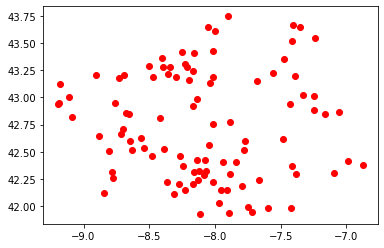

In [10]:
visualizar(g3, [])


## P2.1: Implementaci√≥n b√°sica de B√∫squeda Tab√∫



En este apartado debes desarrollar una versi√≥n b√°sica del algoritmo de B√∫squeda Tab√∫ que resuelva el problema del viajante de comercio (TSP) aplicado a los concellos de Galicia. La especificaci√≥n del algoritmo ser√° muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementaci√≥n totalmente funcional y verificada que resuelva el problema correctamente. Igual que en la P1, consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia.

Implementa el algoritmo b√°sico de B√∫squeda Tab√∫ para resolver el problema del VC enunciado arriba. Para ello, revisa la descripci√≥n algor√≠tmica de la MH vista en la clase expositiva (V√©ase el T1, diapositiva 49 y asociadas).

Ten en cuenta las siguientes consideraciones de dise√±o para completar la implementaci√≥n b√°sica:
- **Representaci√≥n  de  las  soluciones:**  representaci√≥n  de  orden  **(permutaciones)  comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representaci√≥n de orden formada por una secuencia de valores num√©ricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una soluci√≥n *S* se representa como una permutaci√≥n de los dem√°s valores {1, ..., 99}. 


- **Soluci√≥n inicial:** generaci√≥n **totalmente aleatoria** de una permutaci√≥n v√°lida como est√° explicado en los apartados previos.


- **Operador  de  generaci√≥n de vecindario de una soluci√≥n** (generaci√≥n de la soluci√≥n  siguiente  Scand  a  partir  de  la  actual  Sact):  operador  de  intercambio. Con este operador, el n√∫mero m√°ximo de vecinos diferentes que se pued generar a partir de una soluci√≥n dada es (todos los posibles intercambios) es:

$$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

    donde L es la longitud de la soluci√≥n.

- **Funci√≥n de coste:** suma de las distancias del camino seg√∫n el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la soluci√≥n: 0 -> S[0]
    - Distancia recorrida en la soluci√≥n: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    

- **Lista Tab√∫:** La lista tab√∫ (LT) estar√° formada por los **movimientos de intercambio de √≠ndices** {i,j} que den lugar a las soluciones que forman la trayectoria de b√∫squeda. Ten√©is que establecer **N=100** como par√°metro de tenencia tab√∫, esto es, el tama√±o de la lista tab√∫ ser√° de **N** elementos, de forma que un movimiento {i,j} saldr√° de la lista tab√∫ despu√©s de **N=100** operaciones y volver√° a estar permitido.


- **Reinicializaci√≥n:** En el caso de que transcurran **100 iteraciones consecutivas** sin que mejore la soluci√≥n $S_{opt}$ alcanzada hasta el momento, se har√° una reinicializaci√≥n desde $S_{opt}$. Se trata por tanto de una estrategia de reinicializaci√≥n por **intensificaci√≥n**. En el reinicio **no se restaura la lista tab√∫**, para dar opci√≥n a visitar vecinos no visitados anteriormente por estar determinados intercambios prohibidos. Es decir, cuando se hace un reinicio, se vuelve a la soluci√≥n $S_{opt}$ y se vac√≠a la lista tab√∫.


- **Criterio de parada:** Se finaliza la ejecuci√≥n cuando se alcanzan **10.000 iteraciones** del algoritmo.


Para verificar tu implementaci√≥n, **debes utilizar** el fichero de localizaciones de los 100 concellos gallegos **(*grafo100cidades.txt*).** Pod√©is utilizar como prueba para verificar que la implementaici√≥n es correcta inicialmente, el fichero de localizaciones de 8 ciudades gallegas (grafo8cidades.txt). La soluci√≥n √≥ptima resuelta con una b√∫squeda informada como A* se situa en torno a los 382km.

‚ùì **Pregunta 1**. Explica brevemente los detalles relevantes de tu c√≥digo para entender tu implementaci√≥n (p.ej., estructura de tu c√≥digo, funciones, etc.)

In [11]:
# REPRESENTACI√ìN DE LAS SOLUCIONES
# En este dise√±o, a pesar de que siempre se empieza en la ciudad 0 y se acaba en la ciudad 0, se
# procede a almacenar todo el orden de las ciudades, incluyendo las iniciales y las finales, para
# facilitar ciertas funciones como coste.
# [0, 1, 2, 3, 4, 5, 6, 7, 0]

In [12]:
# FUNCI√ìN DE COSTE
def coste(g, sol):
    s = 0
    for i in range(0, len(sol)-1):
        s += g.distancia(sol[i], sol[i+1])
    return s

# Se define adem√°s una funci√≥n de coste de un vecino
# dado. Esto facilita el c√°lculo del coste de los
# vecinos, ya que en vez de realizar nciudades sumas,
# se realizan s√≥lo 6 (los segmentos que cambian).
# Se permite pasar un extra para futuras modificaciones.
def coste_vecino(g, s_act, s_vec, c_act, mov, extra=0.0):
    segmentos = []
    # Primero se mira que segmentos han cambiado
    for m in mov:
        segmentos.append((m-1, m))
        segmentos.append((m, m+1))
    
    c = c_act
    # Y a continuaci√≥n se restan los segmentos
    # de la soluci√≥n original y se suman los del
    # vecino
    for segmento in segmentos:
        i, j = segmento
        c -= g.distancia(s_act[i], s_act[j])
        c += g.distancia(s_vec[i], s_vec[j])

    return c + extra

In [13]:
# SOLUCI√ìN INICIAL
def genera_solucion_inicial(g):
    sol = [x for x in range(1, g.nciudades)]
    random.shuffle(sol)
    return [0] + sol + [0]

In [14]:
# VECINOS PERMITIDOS
def genera_vecinos(g, sact, tabu):
    # Se permiten todos los movimientos tal
    # que i sea mayor que  (ya que puede ser
    # sim√©trico)
    movs = []
    for i in range(1, g.nciudades):
        for j in range(i+1, g.nciudades):
            mov = (i, j)
            # Excepto los que son tab√∫
            if mov in tabu:
                continue
            movs.append(mov)

    vecinos = {}
    # Para cada movimiento permitido, se
    # genera el vecino correspondiente met√≠endolos
    # en un diccionario donde la clave es el
    # movimiento realizado
    for mov in movs:
        scand = sact.copy()
        i, j = mov
        scand[i], scand[j] = sact[j], sact[i]
        vecinos[mov] = scand
    return vecinos

In [15]:
# CONDICI√ìN DE PARADA
DEFAULT_LIMITE = 10000

# TAMA√ëO TAB√ö
N = 100

# REINICIALIZACI√ìN
R = 100

In [16]:
# BUSQUEDA TAB√ö
from tqdm.notebook import tqdm

def busqueda_tabu(g, limite=DEFAULT_LIMITE, incluir_iteracion=False):
    # Se genera la soluci√≥n inicial, la cual ser√° la actual y la √≥ptima inicialmente
    sol_inicial = genera_solucion_inicial(g)
    s_act, c_act = sol_inicial, coste(g, sol_inicial)
    iteracion = 0
    s_opt, c_opt = s_act, c_act
    
    # Se inicializa la lista de elementos tab√∫, y el contador para
    # su reinicializaci√≥n
    tabu = []
    r = 0
    for i in tqdm(range(0, limite), leave=None):
        # Para la soluci√≥n actual, se generan todos los vecinos posibles
        vecinos = genera_vecinos(g, s_act, tabu)
        # Y de todos los vecinos, se busca el que tenga un mejor coste
        mejor_mov, c_mejor_vecino, s_mejor_vecino = None, None, None
        for mov in vecinos.keys():
            vecino = vecinos[mov]
            # Para calcular el coste del vecino, no se usa la funci√≥n
            # est√°ndar de
            # c_vecino = coste(g, vecino)
            # ya que supone un tiempo de ejecuci√≥n muy elevado. Se utiliza
            # la definida para ello a partir de la soluci√≥n actual.
            c_vecino = coste_vecino(g, s_act, vecino, c_act, mov)
            if mejor_mov is None or c_vecino < c_mejor_vecino:
                mejor_mov = mov
                c_mejor_vecino = c_vecino
                s_mejor_vecino = vecino
        
        # La soluci√≥n actual pasa a ser el mejor vecino y, adem√°s, el
        # movimiento que genere a este vecino entrar√° en la lista
        # tab√∫
        s_act, c_act = s_mejor_vecino, c_mejor_vecino
        if len(tabu) == N:
            # Si la lista tiene el l√≠mite de elementos, se elimina el
            # primero de ellos.
            tabu.pop(0)
        tabu.append(mejor_mov)
        
        # Si el coste de la soluci√≥n actual es menor que el de la √≥ptima,
        # esta soluci√≥n actual pasa a ser la √≥ptima, y se reinicia el
        # contador de reinicializaci√≥n
        if c_act < c_opt:
            iteracion = i
            s_opt, c_opt = s_act, c_act
            r = 0
        else:
            r += 1
        
        # En caso de que el contador de reinicializaci√≥n llegue al tope,
        # se reinicializa la lista tab√∫ y se vuelve a la soluci√≥n √≥ptima
        if r == R:
            r = 0
            tabu = []
    
    return s_opt if not incluir_iteracion else (s_opt, iteracion)

  0%|          | 0/1000 [00:00<?, ?it/s]

1948.0143797964515


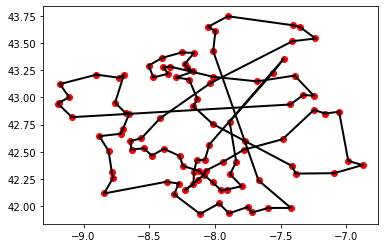

In [17]:
sol = busqueda_tabu(g3, limite=1000)
print(coste(g3, sol))
visualizar(g3, sol)

‚ùì **Pregunta 2**. La parte experimental de la pr√°ctica consiste en realizar **10 ejecuciones diferentes** de la implementaci√≥n realizada y reportar la media y desviaci√≥n est√°ndar de la mejor soluci√≥n obtenida, el n√∫mero de iteraci√≥n en el que se alcanz√≥ y el tiempo de ejecuci√≥n del algoritmo

In [18]:
from tqdm.notebook import trange
from statistics import mean, stdev

def prueba(g, pruebas=10, limite=DEFAULT_LIMITE):
    resultados = []
    for i in tqdm(range(0, pruebas), desc='Pruebas', leave=None):
        start = time.time()
        sol, iteracion = busqueda_tabu(g, limite=limite, incluir_iteracion=True)
        end = time.time() - start
        c = coste(g, sol)
        resultados.append((sol, iteracion, c, end))

    mejor_solucion = None
    for r in resultados:
        if mejor_solucion is None or c < mejor_solucion[2]:
            mejor_solucion = r
    
    print("MEJOR SOLUCION: %f (I=%d, T=%f)" % (mejor_solucion[2], mejor_solucion[1], mejor_solucion[3]))
    visualizar(g, mejor_solucion[0])
    
    if pruebas > 1:
        print("MEDIA: %f" % mean(map(lambda r: r[2], resultados)))
        print("DESVIACI√ìN ESTANDAR: %f" % stdev(map(lambda r: r[2], resultados), xbar=mejor_solucion[2]))

Pruebas:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1601.645533 (I=7889, T=419.630691)


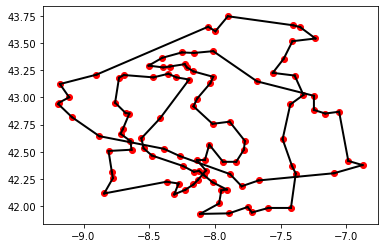

MEDIA: 1648.741190
DESVIACI√ìN ESTANDAR: 112.395935


In [19]:
prueba(g3)

NOTA: s√© conservador en tu estrategia para verificar tu implementaci√≥n, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un n√∫mero elevado de iteraciones, puede resultarte √∫til medir el tiempo que tarda para tomar decisiones sobre donde establecer el l√≠mite. 

 
## P2.2: Mejoras del algoritmo de B√∫squeda Tab√∫ (No obligatorio)
En este apartado el objetivo es aplicar la resoluci√≥n del problema que acab√°is de programar a un nuevo conjunto de 120 localiszaciones tomadas del archivo de [50.000 lugares hist√≥ricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de c√≥mputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

NOTA: Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta secci√≥n el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podr√° modificarse cualquier par√°metro u operador, como por ejemplo:
- **Generaci√≥n de la soluci√≥n inicial** (inicializaci√≥n greedy, ...)
- **Gesti√≥n de la lista tab√∫** con la inclusi√≥n de alg√∫n criterio de aspiraci√≥n (por ejemplo excluir de la lista una soluci√≥n si mejora a la mejor soluci√≥n hasta el momento)
- El **operador de generaci√≥n de vecinos** (por ejemplo no considerar todos los pares de √≠ndices, cambiar el operador de generaci√≥n, ...)
- Utilizar **otras estrategias de reinicializaci√≥n** por intensificaci√≥n (por ejemplo reiniciar desde una soluci√≥n aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tab√∫, ...).
- Cambiar la **estrategia de reinicializaci√≥n para dar diversificaci√≥n** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz sim√©triza *frec* que almacene eln√∫mero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podr√≠a realizar una inicializaci√≥n voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilaci√≥n estrat√©gica** que alterne entre las estrategias de intensificaci√≥n y diversificaci√≥n**-

‚ùì **Pregunta 3**. ¬øQu√© intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, c√≥mo la has implementado, porqu√© las consideras buenas para el problema y presenta tus conclusiones acompa√±adas de los resultados obtenidos.


Pruebas:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1632.382514 (I=3004, T=470.959916)


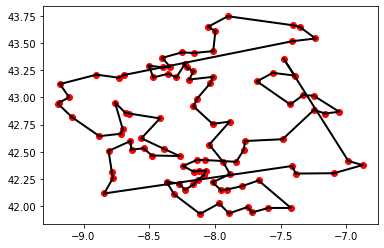

In [20]:
# SOLUCI√ìN INICIAL
# Se prueba ahora a partir de la mejor soluci√≥n posible por b√∫squeda
# local.

genera_solucion_inicial_legacy = genera_solucion_inicial

def genera_solucion_inicial_mejorada(g):
    sol = [0]
    for i in range(1, g.nciudades):
        mejor_punto, mejor_coste = None, None
        for i in range(1, g.nciudades):
            if i in sol:
                continue
            c = g.distancia(sol[len(sol) - 1], i)
            if not mejor_punto or c < mejor_coste:
                mejor_punto, mejor_coste = i, c
        sol.append(mejor_punto)
    return sol + [0]

genera_solucion_inicial = genera_solucion_inicial_mejorada
prueba(g3, pruebas=1)

genera_solucion_inicial = genera_solucion_inicial_legacy

Pruebas:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1638.213527 (I=9921, T=667.544638)


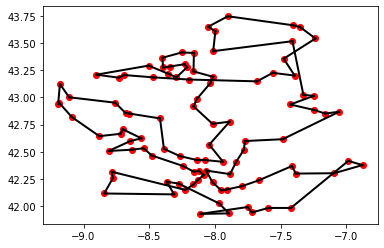

In [21]:
# ESTRATEGIA DE DIVERSIFICACI√ìN
# Se define una matriz de frecuencias donde se almacena la cantidad de veces
# que se visita un par de ciudades. Esta frecuencia ser√° un aditivo a la
# distancia entre ambas para tratar de buscar alternativas.

busqueda_tabu_legacy = busqueda_tabu

def busqueda_tabu_mejorada(g, limite=DEFAULT_LIMITE, incluir_iteracion=False):
    sol_inicial = genera_solucion_inicial(g)
    s_act, c_act = sol_inicial, coste(g, sol_inicial)
    iteracion = 0
    s_opt, c_opt = s_act, c_act
    
    d_max, d_min = None, None
    for i in range(0, g.nciudades):
        for j in range(i+1, g.nciudades):
            if d_max is None or d_max < g.distancia(i, j):
                d_max = g.distancia(i, j)
            if d_min is None or d_min > g.distancia(i, j):
                d_min = g.distancia(i, j)
    d_diff = d_max - d_min

    tabu = []
    frec, max_frec = [[0] * g.nciudades] * g.nciudades, 0
    for i in tqdm(range(0, limite), leave=None):
        vecinos = genera_vecinos(g, s_act, tabu)
        mejor_mov, c_mejor_vecino, s_mejor_vecino = None, None, None
        for mov in vecinos.keys():
            j, k = mov
            vecino = vecinos[mov]
            # Se calcula un aditivo extra a la distancia en funci√≥n de las
            # veces en las que se ha visitado ese par de ciudades
            extra = 0 if max_frec == 0 else (d_diff * (frec[j][k] / max_frec))
            # Se calcula el coste del vecino
            c_vecino = coste_vecino(g, s_act, vecino, c_act, mov, extra)
            if mejor_mov is None or c_vecino < c_mejor_vecino:
                mejor_mov = mov
                c_mejor_vecino = c_vecino
                s_mejor_vecino = vecino
   
        # El movimiento se almacena en la tabla de frecuencias
        j, k = mejor_mov
        frec[j][k] += 1
        if frec[j][k] > max_frec:
            max_frec = frec[j][k]

        s_act, c_act = s_mejor_vecino, coste(g, s_mejor_vecino)
        if len(tabu) == N:
            tabu.pop(0)
        tabu.append(mejor_mov)

        if c_act < c_opt:
            iteracion = i
            s_opt, c_opt = s_act, c_act
    
    return s_opt if not incluir_iteracion else (s_opt, iteracion)

busqueda_tabu = busqueda_tabu_mejorada
prueba(g3, pruebas=1)

busqueda_tabu = busqueda_tabu_legacy

Pruebas:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1596.896583 (I=7162, T=506.638231)


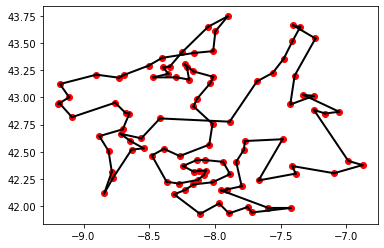

In [22]:
genera_solucion_inicial = genera_solucion_inicial_mejorada
busqueda_tabu = busqueda_tabu_mejorada

prueba(g3, pruebas=1)

busqueda_tabu = busqueda_tabu_legacy
genera_solucion_inicial = genera_solucion_inicial_legacy

---

# Respuestas a las preguntas

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompa√±adas de las implementaciones necesarias para su respuesta.

### P1.1 Especificaci√≥n obligatoria

Esta primera parte se eval√∫a con 6 puntos. Para ello, es necesaria **realizar la implementaci√≥n del algoritmo** y **responder a las preguntas 1 y 2** respetivamente. El conjunto de la implementaci√≥n y las dos preguntas es lo que se evaluar√° en esta primera parte.

‚ùì **Pregunta 1** Explica brevemente los detalles relevantes de tu c√≥digo para entender tu implementaci√≥n (p.ej., estructura de tu c√≥digo, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y f√°cil de seguir.*

**üí¨ Respuesta.** Est√° toda la implementaci√≥n programada en el c√≥digo en las celdas superiores. Cada celda tiene una funci√≥n del algoritmo debidamente comentada y explicada.

‚ùì **Pregunta 2.** La parte experimental de la pr√°ctica consiste en realizar 10 ejecuciones diferentes de la implementaci√≥n realizada y reportar la media y desviaci√≥n est√°ndar de la mejor soluci√≥n obtenida, el n√∫mero de iteraci√≥n en el que se alcanz√≥ y el tiempo de ejecuci√≥n del algoritmo

*Incluye todas las celdas que consideres oportunas para que sea legible y f√°cil de seguir.*


**üí¨ Respuesta.** Se ha realizado las 10 pruebas con las 10.000 iteraciones. El resultado ha sido que la mejor soluci√≥n est√° en torno a 1601, y se ha alcanzado en la iteraci√≥n 7889 con un tiempo de casi 7 minutos.  
La media est√° en 1648, y la desviaci√≥n est√°ndar de 112.

Se puede ver en el grafo como son unos caminos "m√°s o menos l√≥gicos" en el sentido de que se visitan ciudades cercanas.

### Especificaci√≥n optativa (mejoras)

Esta segunda parte es optativa y se evaluar√° sobre 4 puntos. Para ello es necesario que realic√©is la implementaci√≥n de las mejoras, mostr√©is el c√≥digo en el que han sido implementadas y coment√©is el porqu√© de estas mejoras y los resultados obtenidos.

‚ùì **Pregunta 3.** ¬øQu√© intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, c√≥mo la has implementado, porqu√© las consideras buenas para el problema y presenta tus conclusiones acompa√±adas de los resultados obtenidos.

*Incluye todas las celdas que consideres oportunas para que sea legible y f√°cil de seguir.*

**üí¨ Respuesta.** Se han hecho dos modificaciones: una soluci√≥n inicial greedy, y una diversificaci√≥n en la estrategia de b√∫squeda.

La primera de ellas, la inicializaci√≥n de una soluci√≥n greedy, se puede ver a simple vista como la distancia de una soluci√≥n √≥ptima se reduce entorno a 300 unidades. Adem√°s, en la representaci√≥n, se puede ver tambi√©n como se sigue un path hacia las ciudades m√°s pr√≥ximas no visitadas anteriormente.

En cuanto a la segunda, se introduce una matriz de frecuencias y las distancias de los vecinos se da un aditivo para evitar visitar las mismas todo el rato. Primero de todo, se aprecia como el algoritmo es m√°s lento que la implementaci√≥n de reinicializaci√≥n. En cuanto al resultado, tambi√©n se ve como se mejora entorno a 300, pero con la diferencia de que la soluci√≥n √≥ptima se aprecia en casi la √∫ltima iteraci√≥n, lo cual indica que el algoritmo si se metiesen m√°s iteraciones es posible que encontrase otro path mejor.